## Business Understanding

#### Business context
In today's fast-paced and highly competitive business environment, effective advertising and marketing strategies are crucial for companies aiming to maximize their product or service sales. Companies invest substantial budgets in various advertising channels such as TV, radio, and newspaper advertisements. However, determining the optimal allocation of resources to these advertising channels to achieve the highest possible sales is a complex and critical decision for any business.

In this context, we have developed a Sales Prediction application powered by machine learning. This application enables businesses to make data-driven decisions about their advertising budget allocation, helping them optimize their sales and marketing strategies.

#### Problem statement
The primary challenge in the advertising and marketing domain for businesses is the allocation of budgets among various advertising channels, including TV, radio, and newspaper, in order to maximize sales. This challenge arises due to the lack of a clear understanding of each channel's impact on sales, often resulting in inefficient resource allocation and suboptimal outcomes. This multifaceted issue encompasses both resource allocation and sales prediction. Businesses need to make informed decisions about how much budget to allocate to each advertising channel, a complex task without insights into their individual effectiveness. To address this, our Sales Prediction application provides a data-driven solution. By inputting advertising budgets for TV, radio, and newspaper, businesses can receive sales predictions, allowing them to experiment with different budget allocations and select the combination that maximizes sales. This empowers businesses to make more informed and efficient marketing decisions, enhancing the return on investment for their advertising budgets and ultimately driving sales growth.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the data
df = pd.read_csv("advertising.csv",encoding='ISO-8859-1')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Data understanding

1. Are there any missing values in the dataset?

In [3]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

The dataset has no missing values

2. Any duplicates?

In [4]:
df.duplicated().sum()

0

There are no duplicates

3. Check the shape of the dataset

In [5]:
df.shape

(200, 4)

4. Check the data types of the different features

In [6]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

### Exploratory Data Analysis

1. Check the descriptive statistics

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


2. What is the distribution of the variables?

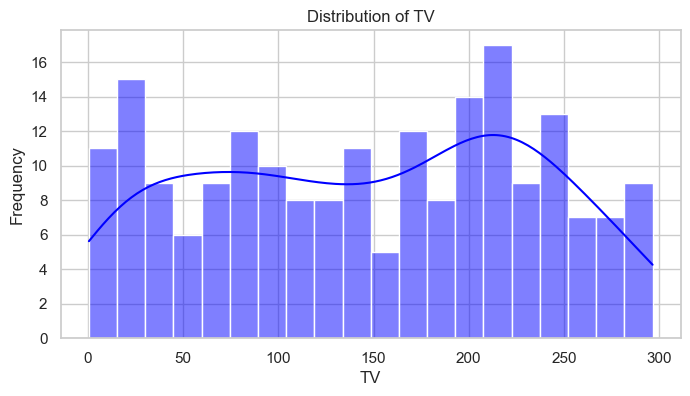

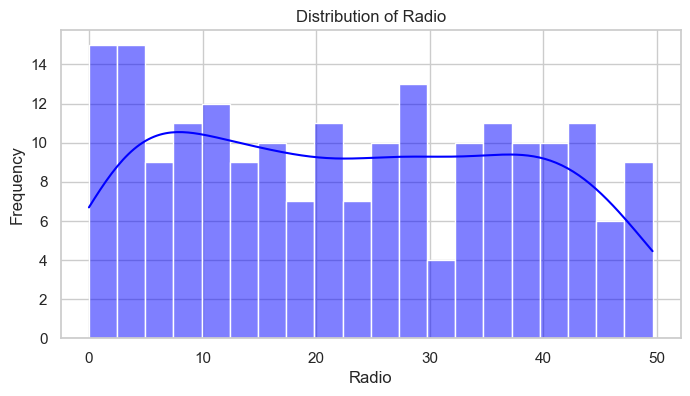

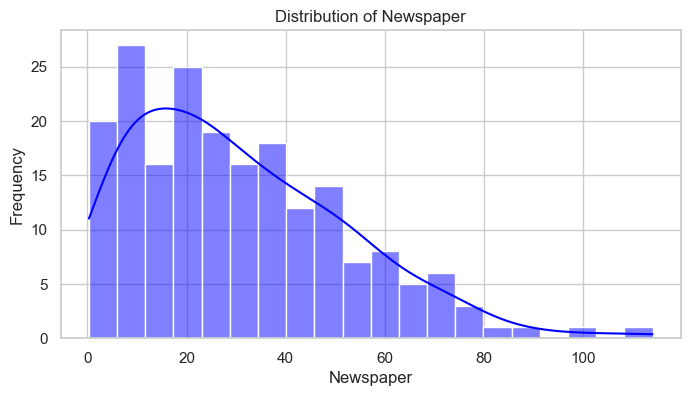

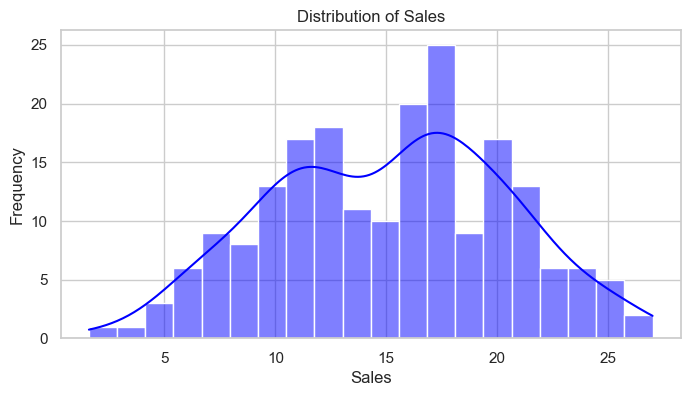

In [8]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")
features = ['TV', 'Radio', 'Newspaper', 'Sales']
# Create subplots for each feature
for feature in features:
    plt.figure(figsize=(8, 4)) 
    plt.title(f'Distribution of {feature}')
    
    # Use a histogram to visualize the distribution
    sns.histplot(df[feature], kde=True, bins=20, color='blue')
    
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


Radio Distribution:
- The Radio distribution appears roughly symmetric and more normally distributed compared to 'TV'.
- It doesn't exhibit a strong skew, and data points are spread relatively evenly across the range of values.

Newspaper Distribution:
- The Newspaper distribution seems to be positively skewed, with a long tail towards higher values. This suggests that higher spending on newspaper advertising is less common.

Sales Distribution:
- The Sales distribution appears to be somehow symmetric, though not fully symmetric.

TV Distribution:
- The TV distribution has more data points spread towards the higher values. This suggest that more money is spent TV adverts.

3. Which advertising channel has the strongest impact on Sales?

In [9]:
correlation_tv = df['TV'].corr(df['Sales'])
correlation_radio = df['Radio'].corr(df['Sales'])
correlation_newspaper = df['Newspaper'].corr(df['Sales'])

strongest_channel = max(
    [('TV',abs(correlation_tv)), ('Radio', abs(correlation_radio)), ('Newspaper', abs(correlation_newspaper))],
    key= lambda x: x[1]
)
print(f"The channel with the strongest impact on Sales is{strongest_channel}")

The channel with the strongest impact on Sales is('TV', 0.9012079133023306)


4. What is the correlation between the features?

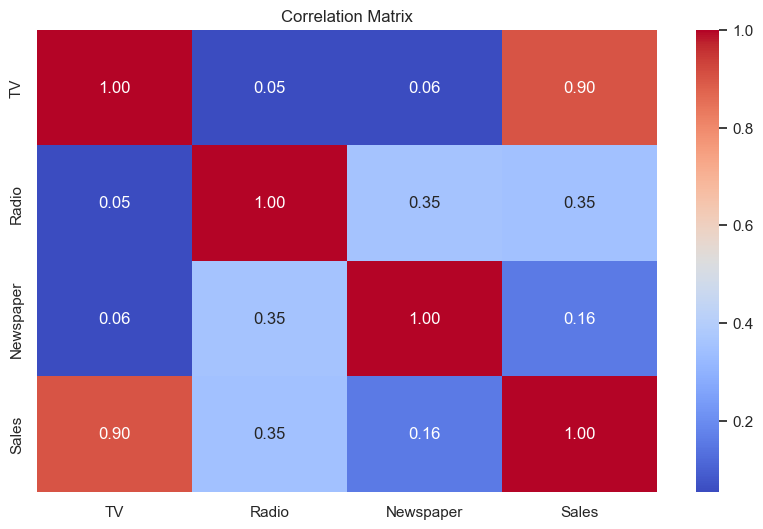

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

6. Does a relationship between advertisements and Sales exist?

In [11]:
df['Total spent'] = df['TV']+ df['Newspaper'] + df['Radio']
df

,TV,Radio,Newspaper,Sales,Total spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,14.0,107.2
197,177.0,9.3,6.4,14.8,192.7
198,283.6,42.0,66.2,25.5,391.8


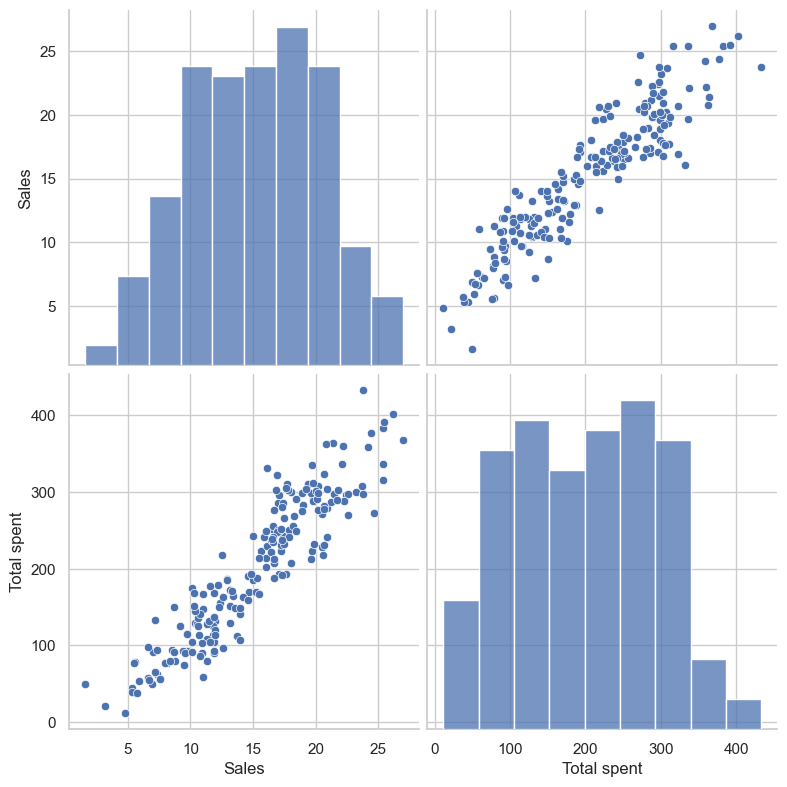

In [12]:
pairplot_data = df[['Sales', 'Total spent']]

# Create a pair plot
sns.set(style="whitegrid")
sns.pairplot(pairplot_data, height=4)
plt.show()


The scatter plot shows a positive linear correlation between Sales and Total spent. As the Total spent increases, sales increases too.This suggests that there is a positive association between advertising spending and sales.


5. Check the outliers

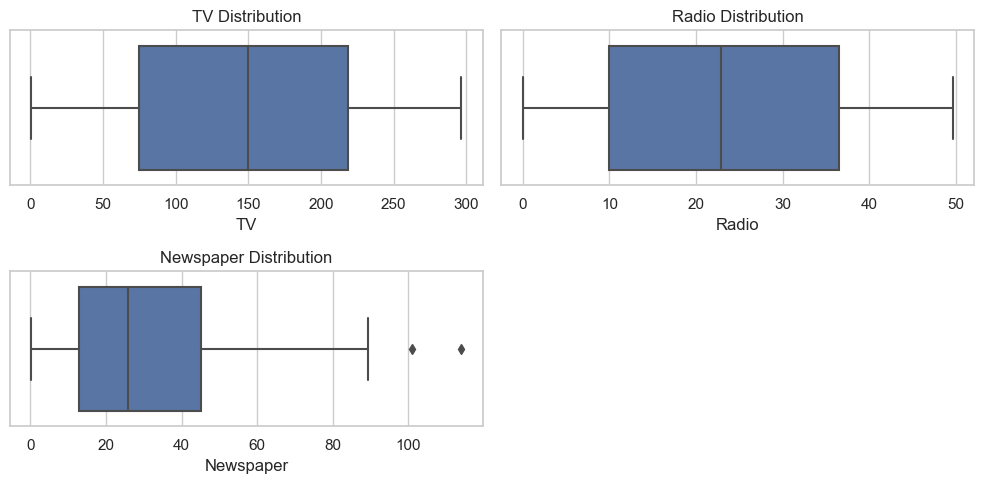

In [13]:
cols = ['TV', 'Radio','Newspaper']

#function to remove outliers
def remove_outliers(df, columns,threshold =10):

    df_cleaned = df.copy()
    for column in columns:

         z_scores = (df[column]- df[column].mean())/df[column].std()
         outliers = df_cleaned.loc[abs(z_scores)> threshold]
         df_cleaned = df_cleaned.drop(outliers.index)
    return df_cleaned
df = remove_outliers(df,cols)

# Plot box plots for the cleaned DataFrame
plt.figure(figsize=(10, 5))
for i, column in enumerate(cols):
    plt.subplot(len(cols)//2 + len(cols)%2, 2, i+1)
    sns.boxplot(data=df, x=column)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()

### Define predictor variables and the target variable

In [14]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Feature scaling using Min-Max scaling
scaler1 = MinMaxScaler()
X = scaler1.fit_transform(X)
# Save the scaler to a file
joblib.dump(scaler1, 'scaler.pkl')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

This is a regression task. We will use; Linear regresion, Decision trees regression and Random Forest Regression.

#### 1. Baseline Model; Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#instatiate linear regression
lr = LinearRegression()
#fit the model
lr_model = lr.fit(X_train, y_train)
#predictions on training and test data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
#calculate metrics for regression
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE train:", mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE test:",mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:",r2_train)
r2_test = r2_score(y_test, y_test_pred)
print("R2 test:", r2_test)


MSE train: 2.676142653782668
MSE test: 2.907756910271095
R2 train: 0.9001416005862131
R2 test: 0.9059011844150825


### 2. Decision tree regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
#instantiate Decision tree regressor
dtr = DecisionTreeRegressor(random_state=34)
#fit the model
dtr_model = dtr.fit(X_train, y_train)
#make predictions on training and test data
y_train_pred = dtr_model.predict(X_train)
y_test_pred = dtr_model.predict(X_test)
#determine the model performance
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE train:", mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE test:",mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:",r2_train)
r2_test = r2_score(y_test, y_test_pred)
print("R2 test:",r2_test)

MSE train: 0.0
MSE test: 2.9334999999999996
R2 train: 1.0
R2 test: 0.905068104371689


### 3. Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
# Fit the model on the training data
rf_regressor.fit(X_train, y_train)
# Make predictions on the training and test data
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate regression metrics
mse_train = mean_squared_error(y_train,y_train_pred)
print("Mse train:",mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mse test:",mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:", r2_train)
r2_test = r2_score(y_test, y_test_pred)
print("R2 test:",r2_test)


Mse train: 0.23189817499999793
Mse test: 1.4383176500000008
R2 train: 0.9913468810977822
R2 test: 0.953454160207889


### 4. XGBoost

In [19]:
import xgboost as xgb
# Instantiate an XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate metrics for regression
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE train:", mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE test:", mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:", r2_train)
r2_test = r2_score(y_test, y_test_pred)
print("R2 test:", r2_test)

MSE train: 4.963595792194059e-06
MSE test: 1.4478565101796619
R2 train: 0.9999998147868797
R2 test: 0.9531454702201649


XGboost seems to perform well with little overfitting. We will then tune it to improve its performance

In [20]:
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 7, 'n_estimators': 50}


In [22]:
# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [7],  
    'n_estimators': [50] 
}

# Create a Grid Search model
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the Grid Search model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the Grid Search
best_max_depth = grid_search.best_params_['max_depth']
best_n_estimators = grid_search.best_params_['n_estimators']

# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=best_max_depth, n_estimators=best_n_estimators, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics and best hyperparameters
print(f"Best max_depth: {best_max_depth}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Best max_depth: 7
Best n_estimators: 50
Mean Squared Error (MSE): 1.49821500690422
R-squared (R2) Score: 0.9515158034211009


In [23]:
# Save the trained model to a file
joblib.dump(best_xgb_model, 'Sales1_model.pkl')

['Sales1_model.pkl']

### Testing

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load the pre-trained XGBoost model
xgb_model = joblib.load('Sales1_model.pkl')

# Load the scaler used for feature scaling
scaler = joblib.load('scaler.pkl')

# Prepare input data for prediction
input_data = pd.DataFrame({
    'TV': [34],  
    'Radio': [23.3],
    'Newspaper': [45.1]
})

# Scale the input data using the same scaler
input_data_scaled = scaler.transform(input_data)

# Make predictions
prediction = xgb_model.predict(input_data_scaled)

# Display the predicted sales
print(f"Predicted Sales: {prediction[0]} units")


Predicted Sales: 8.002610206604004 units


### Insights and Recommendations
- Insights

1. The Most Effective Advertising Channel:
Among the advertising channels (TV, radio, and newspaper), it's clear that "TV" advertising has the strongest impact on our sales. This means that when we invest more in TV advertising, we tend to see a significant increase in sales.

2. Positive Association Between Spending and Sales:
The data shows that there's a positive relationship between the amount we spend on advertising (Total spent) and our sales. In simple terms, when we invest more in advertising, our sales tend to go up. This suggests that spending on advertising can be a powerful way to boost our sales.

3. Radio Advertising and Newspaper Advertising:
Radio Advertising: The data related to radio advertising shows that it's quite evenly spread, meaning that it doesn't have extreme highs or lows. This suggests that investing in radio advertising can be a relatively stable and less risky choice.
Newspaper Advertising: On the other hand, the data related to newspaper advertising is more concentrated toward lower spending and has fewer cases of high spending. This means that high spending on newspaper advertising is less common and may not have a strong impact on sales.

4. Distributions of Sales and TV Advertising:
Sales Distribution: The data related to our sales looks reasonably balanced, although not perfectly so. This means that our sales data doesn't show extreme patterns and is relatively stable.
TV Advertising Distribution: When we look at the data related to TV advertising, we notice that there's a larger concentration of higher spending. This suggests that we tend to spend more on TV advertising compared to other channels, and it's important to assess the effectiveness of this higher spending.

- Recommendations

Invest More in TV Advertising: Since TV advertising has the most impact on our sales, it's a good idea to put a larger portion of our advertising budget here to maximize our sales.

Keep an Eye on Total Spending: Increasing our overall advertising budget can lead to higher sales. So, it's important to monitor our budget and ensure that it's in line with our sales goals.

Consider Radio Advertising: Radio advertising appears to be a relatively stable option, so we might want to allocate some budget to it.

Be Cautious with Newspaper Ads: High spending on newspaper advertising is less common, so we should be careful about allocating a significant portion of our budget here.

Stay Flexible and Adjust: Our data suggests that our current strategy is balanced. To ensure ongoing success, we should adapt our strategy as market conditions and customer behavior change. Regularly reviewing our approach is key.

### Conclusion and Next steps
In conclusion, our analysis of the advertising and sales data has provided valuable insights that can guide our marketing strategy. The data clearly indicates that TV advertising has the most significant impact on sales, making it a pivotal channel for us. Additionally, there is a positive association between advertising spending and sales, implying that increasing our advertising budget can lead to higher sales. Radio advertising appears to be a stable and less risky option, while newspaper advertising, with its limited impact, requires caution.

Our current strategy shows a balanced approach, allowing us to adapt to changing market conditions and customer behavior. However, it's essential to monitor, assess, and adjust our strategy to maintain optimal results.

#### Next steps:

Allocate Budget Strategically: Implement a budget allocation strategy that prioritizes TV advertising, considering its strong impact on sales. Allocate a significant portion of the budget to this channel.

Continuously monitor the performance of our advertising campaigns. Regularly assess the impact of different spending levels on sales and be ready to adjust our budget allocation as needed to maximize results.

Diversify with Radio: While TV remains a key focus, consider diversifying by allocating a portion of the budget to radio advertising, as it is relatively stable and less risky.

Be cautious when allocating funds to newspaper advertising, especially high spending. The data suggests that it may not have a significant impact on sales.

Evaluate High TV Spending: Investigate the effectiveness of high spending on TV advertising. Ensure that the increased investment in this channel translates into a proportional increase in sales.

Data Collection: Continue collecting and analyzing data to refine our predictions and stay aligned with changing market dynamics.

Customer Feedback: Gather customer feedback to understand how advertising impacts their purchasing decisions, providing qualitative insights to complement the quantitative analysis.

Competitor Analysis: Keep an eye on competitors' advertising strategies and successes to fine-tune our own strategy.